In [1]:
# see test file test_burgers_initial_vs_pypde.sh
# this file runs the second part of the test, runs PyPDE and compares the results

In [15]:
import numpy as np
import pandas as pd
import sys
import os
from glob import glob
from json import load as json_load
from numpy.fft import fft,ifft,fftfreq,fftshift
from numpy import sin,cos,exp,log,sqrt,pi

## Matplotlib Parameters

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [4]:
colors = plt.cm.Blues(np.linspace(0,1,10))
colors = plt.cm.viridis(np.linspace(1,0,10))

In [5]:
#rcParams['lines.linewidth'] = 2
#rcParams['lines.linestyle'] = '--'
rcParams['axes.titlesize'] = 16
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'
#rcParams['font.family'] = "sans-serif"
#rcParams['font.family'] = ["Helvetica"]
#rcParams['font.sans-serif'] = ['Helvetica']

In [6]:
from matplotlib.ticker import FuncFormatter

def format_basis10(x):
    return np.sign(x)*10**(-np.floor(np.log10(abs(x)))+np.log10(abs(x)))

def format_exp10(x):
    return np.floor(np.log10(abs(x)))

def MyFormatter(x,lim):
    if x == 0:
        return f'$0$'
    return f'${format_basis10(x):.1f} \\times 10^{{{format_exp10(x):.0f}}}$'
    #The first argument of the format gives the first significant digits of the number with the sign preserved and brought to a range between [1-10), The next argument gives the  numbers integer exponent of 10
    #Both the first and second arguments are formatted to display only 2 decimal places due to the lack of space.
    
majorFormatter = FuncFormatter(MyFormatter)

## Load data

In [37]:
from _functions import *

In [16]:
# parent directory
path = os.path.abspath(os.path.join(os.path.abspath(''), os.pardir))
sys.path.append(path+'/scripts')

In [25]:
# hashes are saved with 10 characters, hence 10 ?
# is there a better way to do this without regex ?
all_files = glob(f'{path}/data/params_??????????.json')
all_files.sort()

In [26]:
for file_path in all_files:
    with open(file_path,'r') as file:
        json_data = json_load(file)

In [27]:
df = pd.DataFrame([json_data])

In [28]:
df

,BN,Lrelative,Ttotal,N,nu,Ltotal,L,sqeps,dx,NT,...,sqdx,cfl_const,dt,nlinear,fkernel,initial_value,scheme,saveformat,R,dict_hash
0,8,0.125,1.0,256,0.01,1.0,0.125,1.0,0.003906,655360,...,0.0625,0.1,0.000002,True,zero_forcing,sine_initial,ETD,real,90000,5c839169f0


In [35]:
prefix = 0

BN              = df.at[prefix,'BN']
Lrelative       = df.at[prefix,'Lrelative']
Ttotal          = df.at[prefix,'Ttotal']
N               = df.at[prefix,'N']
nu              = df.at[prefix,'nu']
Ltotal          = df.at[prefix,'Ltotal']
L               = df.at[prefix,'L']
sqeps           = df.at[prefix,'sqeps']
dx              = df.at[prefix,'dx']
NT              = df.at[prefix,'NT']
NTsave          = df.at[prefix,'NTsave']
viscte          = df.at[prefix,'viscte']
sqdx            = df.at[prefix,'sqdx']
cfl_const       = df.at[prefix,'cfl_const']
dt              = df.at[prefix,'dt']
nlinear         = df.at[prefix,'nlinear']
fkernel         = df.at[prefix,'fkernel']
initial_value   = df.at[prefix,'initial_value']
scheme          = df.at[prefix,'scheme']
saveformat      = df.at[prefix,'saveformat']
R               = df.at[prefix,'R']
dict_hash       = df.at[prefix,'dict_hash']

## Import data from simulations

In [9]:
# this is a hard coded file because the test has these fixed parameters as well

#file_suffix = 'R_90000_N_008_Ltotal_001.0_L_003_sqeps_1.000000_nu_002_T_1.0e+00_NT_000'
file_suffix = f'R_{R:05d}_{dict_hash}'
with open(path+'/data/params_'+file_suffix+'.json','r') as file:
    json_data = json_load(file)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bt308146/Github/burgers-spectral-python/data/params_R_90000_N_008_Ltotal_001.0_L_003_sqeps_1.000000_nu_002_T_1.0e+00_NT_000.json'

In [10]:
R = int(json_data['R']/1000)
BN = json_data['BN']
Lrelative = json_data['Lrelative']
Ttotal = json_data['Ttotal']
N = json_data['N']
nu = json_data['nu']
Ltotal = json_data['Ltotal']
sqeps = json_data['sqeps']
dx = json_data['dx']
NT = json_data['NT']
NTsave = json_data['NTsave']
viscte = json_data['viscte']
sqdx = json_data['sqdx']
cfl_const = json_data['cfl_const']
nlinear = json_data['nlinear']
fkernel = json_data['fkernel']
initial_value = json_data['initial_value']
scheme = json_data['scheme']
saveformat = json_data['saveformat']

NameError: name 'json_data' is not defined

# Plot Velocity Field Profiles

In [11]:
vspace = np.load(path+'/data/burgers_'+file_suffix+'.npz')['u']

In [12]:
X = fftshift( fftfreq(N) * Ltotal )

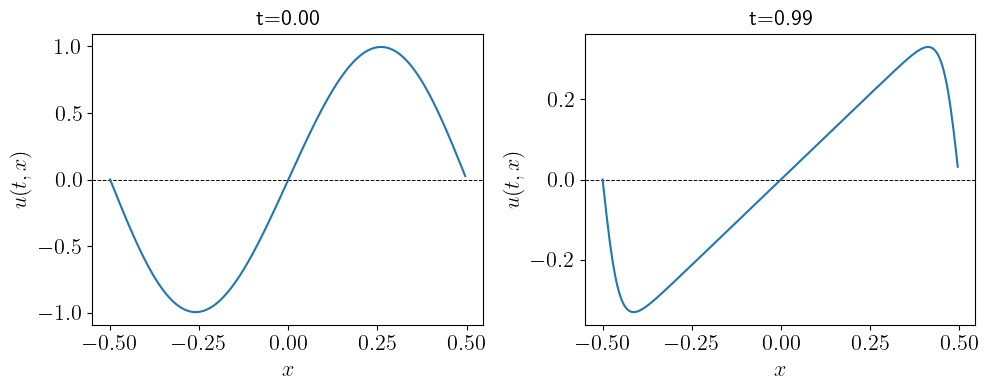

In [13]:
# initial profile of velocity field
fig, ax = plt.subplots(1,2, figsize=(10,4))

t_slice = 0
ax[0].set_title(f"t={t_slice/NTsave*Ttotal:.2f}")
ax[0].set_ylabel("$u(t,x)$")
ax[0].set_xlabel("$x$")
ax[0].axhline(y=0,linestyle='dashed',color='k',linewidth=0.7) # axis line
ax[0].plot(X,np.real(np.fft.fftshift(vspace[0,:])),label='real part')
#ax[0].yaxis.set_major_formatter(majorFormatter)
#ax[0].plot(np.imag(np.fft.fftshift(vspace[0,:])),label='imag part')
#ax[0].legend()

t_slice = NTsave-1
# final profile of velocity field
ax[1].set_title(f"t={t_slice/NTsave*Ttotal:.2f}")
ax[1].set_ylabel("$u(t,x)$")
ax[1].set_xlabel("$x$")
ax[1].axhline(y=0,linestyle='dashed',color='k',linewidth=0.7) # axis line
ax[1].plot(X,np.real(np.fft.fftshift(vspace[t_slice,:])))
#ax[1].yaxis.set_major_formatter(majorFormatter)
#ax[1].plot(np.imag(np.fft.fftshift(vspace[900,:])))

plt.tight_layout()
#plt.savefig(f'{path}/figs/bwn_velocity_profile_finite.png', dpi=200, facecolor='white', transparent=False)
plt.show()

# With Py PDE

In [14]:
from pde import CartesianGrid,ScalarField,PDE,MemoryStorage

/opt/anaconda3/lib/python3.9/site-packages/pde/tools/config.py:223: UserWarning: `numpy` version 1.22.0 required for py-pde (installed: 1.21.6)
  warnings.warn(f"{msg} (installed: {version})")


In [15]:
# warning: only works for Ltotal = 1., don't know how to input Ltotal in definition of state
assert np.abs(Ltotal-1.0) < 10.*np.finfo(float).eps, f"Ltotal must be 1.0, got: {Ltotal}"
grid = CartesianGrid([[-0.5*Ltotal,0.5*Ltotal]], [N], periodic=True) # generate grid
#state = ScalarField.from_expression(grid, "sin(2*pi*x/Ltotal)")
state = ScalarField.from_expression(grid, "sin(2*pi*x)")

In [16]:
storage = MemoryStorage()

trackers = [
    "progress",  # show progress bar during simulation
    #"steady_state",  # abort when steady state is reached
    storage.tracker(interval=Ttotal/NTsave)  # store data every simulation time unit
    #pde.PlotTracker(show=True),  # show images during simulation
    # print some output every 5 real seconds:
    #pde.PrintTracker(interval=pde.RealtimeInterrupts(duration=5)),
]

In [17]:
eq = PDE(
    {'u': '-u * d_dx(u) + nu * laplace(u)'},
    consts={'nu':nu}
    )

  0%|          | 0/1.0 [00:00<?, ?it/s]

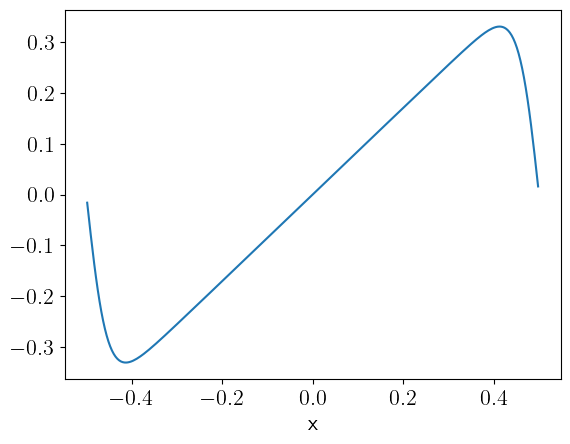

In [18]:
result = eq.solve(state, t_range=Ttotal, tracker=trackers) # solve the pde
result.plot()                                              # plot the resulting field

In [19]:
XPDE = -0.5*Ltotal + (np.arange(N)+.5)*dx

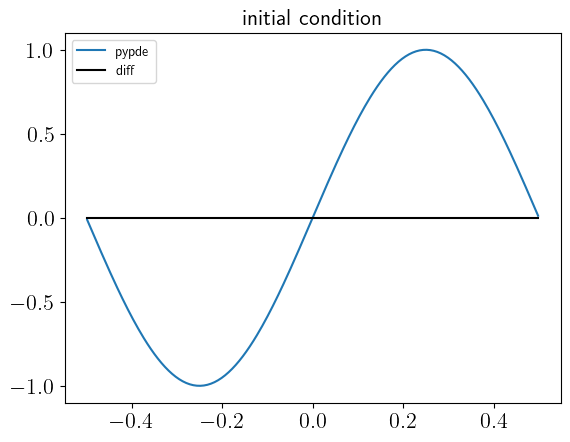

In [20]:
# initial state
plt.title( 'initial condition' )
plt.plot( XPDE, storage[0].data, label='pypde' )
plt.plot( XPDE, np.sin(2.*np.pi*XPDE)-storage[0].data, color='k', label='diff' )
plt.legend()
plt.show()

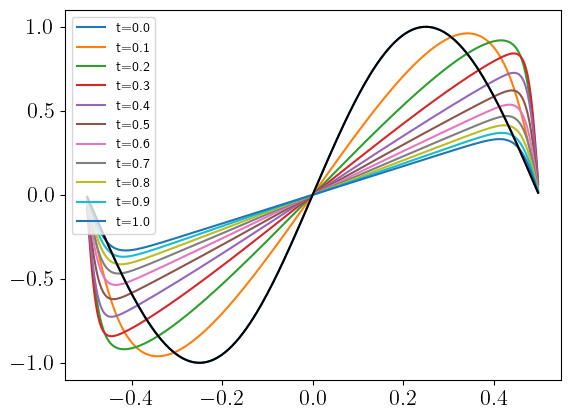

In [21]:
for i,field in enumerate(storage):
    if i%10==0:
    #if i==1000:
        plt.plot(XPDE, field.data, label=f't={i*Ttotal/NTsave}')
#plt.plot( X, result.data, color='red' )
plt.plot( XPDE, np.sin(2.*np.pi*XPDE), color='k' )
plt.legend()
plt.show()

In [22]:
t_slice_list = np.array([ [0, 20], [40, 60], [80 , 99] ], dtype=int)
if ( np.any(t_slice) < 0 or np.any(t_slice) > NTsave ):
    raise IndexError('Invalid time slice')

In [1]:
# list ['a',...,'z']
alphabet = list(map(chr, range(97, 123)))

# convert from (i,j) to corresponding letter in the alphabet
def ij_to_alphabet(i,j):
    
    nx = t_slice_list.shape[0]
    ny = t_slice_list.shape[1]
    
    return alphabet[i*ny+j]

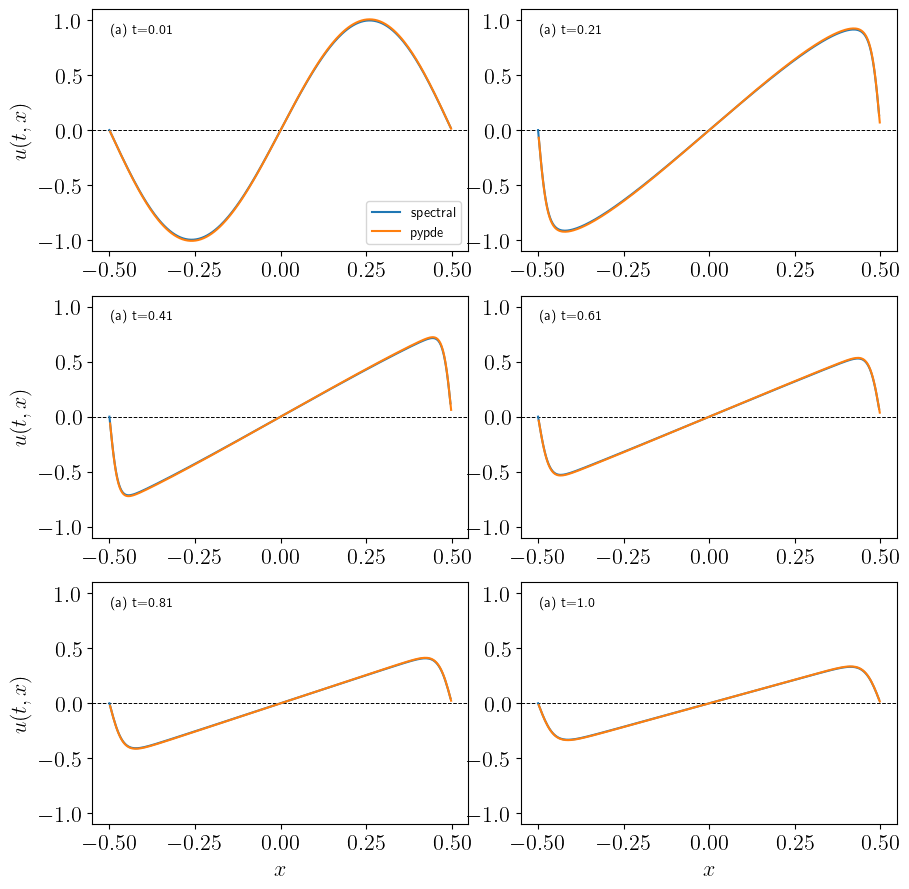

In [27]:
# initial profile of velocity field
fig, ax = plt.subplots(t_slice_list.shape[0], t_slice_list.shape[1], figsize=(9,9))

for i in range(t_slice_list.shape[0]):    
    for j in range(t_slice_list.shape[1]):

        t_slice = t_slice_list[i,j]
        
        spec_vals = np.real(np.fft.fftshift(vspace[t_slice,:]))
        # below, item() is used to convert np.int64 to native python integer
        # only native python integers can be used for indexing arrays
        pde_vals  = storage[t_slice.item()+1].data
        diff_vals = pde_vals - spec_vals

        ax[i,j].axhline(y=0,linestyle='dashed',color='k',linewidth=0.7) # axis line
        ax[i,j].plot(X,spec_vals,label='spectral')
        ax[i,j].plot(XPDE,1.01*pde_vals,label='pypde')
        ax[i,j].text(0.05,0.9,f'({ij_to_alphabet(i,j)}) t={(t_slice+1)*Ttotal/NTsave}',transform=ax[i,j].transAxes)
        ax[i,j].set_ylim(-1.1,1.1)

# y label on the left corner
ax[0,0].set_ylabel("$u(t,x)$")
ax[1,0].set_ylabel("$u(t,x)$")
ax[2,0].set_ylabel("$u(t,x)$")
# x label on the bottom row
ax[2,0].set_xlabel("$x$")
ax[2,1].set_xlabel("$x$")

ax[0,0].legend(loc='lower right')

plt.tight_layout()
#plt.savefig(f'{path}/figs/bwn_velocity_profile_finite.png', dpi=200, facecolor='white', transparent=False)
plt.show()

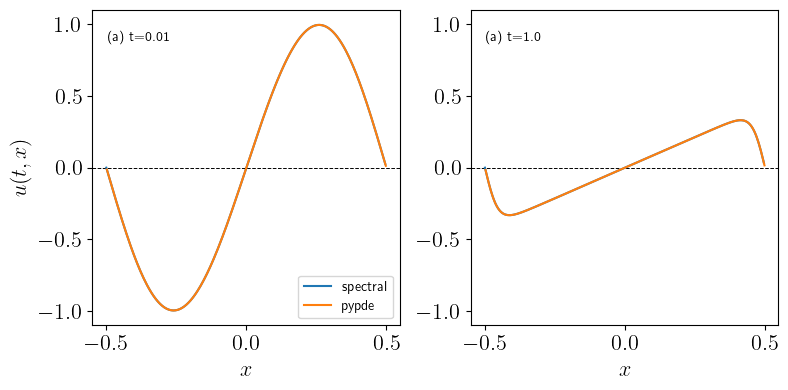

In [24]:
# initial profile of velocity field
fig, ax = plt.subplots(1, 2, figsize=(8,4))



t_slice = 0
i = 0

spec_vals = np.real(np.fft.fftshift(vspace[t_slice,:]))
# below, item() is used to convert np.int64 to native python integer
# only native python integers can be used for indexing arrays
pde_vals  = storage[t_slice+1].data
diff_vals = pde_vals - spec_vals

ax[i].axhline(y=0,linestyle='dashed',color='k',linewidth=0.7) # axis line
ax[i].plot(X,spec_vals,label='spectral')
ax[i].plot(XPDE,pde_vals,label='pypde')
ax[i].text(0.05,0.9,f'(a) t={(t_slice+1)*Ttotal/NTsave}',transform=ax[i].transAxes)
ax[i].set_ylim(-1.1,1.1)

t_slice = 99
i = 1

spec_vals = np.real(np.fft.fftshift(vspace[t_slice,:]))
# below, item() is used to convert np.int64 to native python integer
# only native python integers can be used for indexing arrays
pde_vals  = storage[t_slice+1].data
diff_vals = pde_vals - spec_vals

ax[i].axhline(y=0,linestyle='dashed',color='k',linewidth=0.7) # axis line
ax[i].plot(X,spec_vals,label='spectral')
ax[i].plot(XPDE,pde_vals,label='pypde')
ax[i].text(0.05,0.9,f'(b) t={(t_slice+1)*Ttotal/NTsave}',transform=ax[i].transAxes)
ax[i].set_ylim(-1.1,1.1)

# y label on the left corner
ax[0].set_ylabel("$u(t,x)$")
# x label on the bottom row
ax[0].set_xlabel("$x$")
ax[1].set_xlabel("$x$")

ax[0].legend(loc='lower right')

plt.tight_layout()
#plt.savefig(f'{path}/figs/bwn_velocity_profile_finite.png', dpi=200, facecolor='white', transparent=False)
plt.show()